till now i have extracted the image data from using diffrent ocr techniques  and have done some basic text preprocessing like tokenization,lowercasing,removing Puncuation,removing stop words and lemmatizing . now we have the text from the image and we can process text for the conducting feature extrapolation for the text 

In [1]:
!pip install spacy


  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/39/e1/08681583569f435347ced0535b27c073fcc9a927d9b4293c963092f2d01c/spacy-3.7.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Using cached murmurhash-1.0.10-cp311-cp31


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 325.1 kB/s eta 0:00:40
     --------------------------------------- 0.1/12.8 MB 491.5 kB/s eta 0:00:26
      -------------------------------------- 0.2/12.8 MB 980.4 kB/s eta 0:00:13
     - -------------------------------------- 0.4/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.8 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 3.2 MB/s eta 0:00:04
     ------ --------------------------------- 2.0/12.8 MB 5.6 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 5.6 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 5.6 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 4.8 MB/s eta 0:00:03
     -------- ------------------------------- 2.7/12.8 MB 4.9 M


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


lets bring the text for that we need to do as follows

Choose a random image ----> Display the image ----> Get the decorator function ----> Image to text using Langchain ----> NLP preprocessing methods ----> Apply NLTK NER


In [4]:
directory_path = r"C:\Users\Anime\Downloads\soul_ai\dataset"

This function was created solely for testing purposes, to cover all possible cases before moving to production. If things were to go to production, there might be problems. Therefore, I wrote this function that takes an image from a specified directory and applies the complete solution to the problem. This was done to speed up the process, as I have never worked on image extraction before, and it is a complete study in itself to determine what preprocessing might be needed. The goal was to complete this project in a scrappy way and then iterate to find a better solution. For now, I will focus on implementing the ideas present in the task

In [5]:
import os
import random

def get_random_image_path(directory_path):
    list_of_targeted_folders = ['Email', 'Letter', 'Memo', 'News',  'Resume', 'Scientific']

    image_extensions = ['.jpg', '.jpeg']

    # Randomly select a folder
    random_folder = random.choice(list_of_targeted_folders)
    folder_path = os.path.join(directory_path, random_folder)

    # List to store all image paths in the randomly selected folder
    folder_image_paths = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if os.path.splitext(filename)[1].lower() in image_extensions:
            image_path = os.path.join(folder_path, filename)
            folder_image_paths.append(image_path)

    # Check if there are any images in the folder
    if folder_image_paths:
        # Randomly select an image
        random_image_path = random.choice(folder_image_paths)
        return random_image_path
    else:
        return None

This code was present on stackover flow that makes easy to view the image in the jupyternotebook 

In [6]:
import matplotlib.pyplot as plt
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
# this code dispay the image in the origanl dimenstions 
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

Randonly selected image is C:\Users\Anime\Downloads\soul_ai\dataset\Scientific\87678393_87678399.jpg


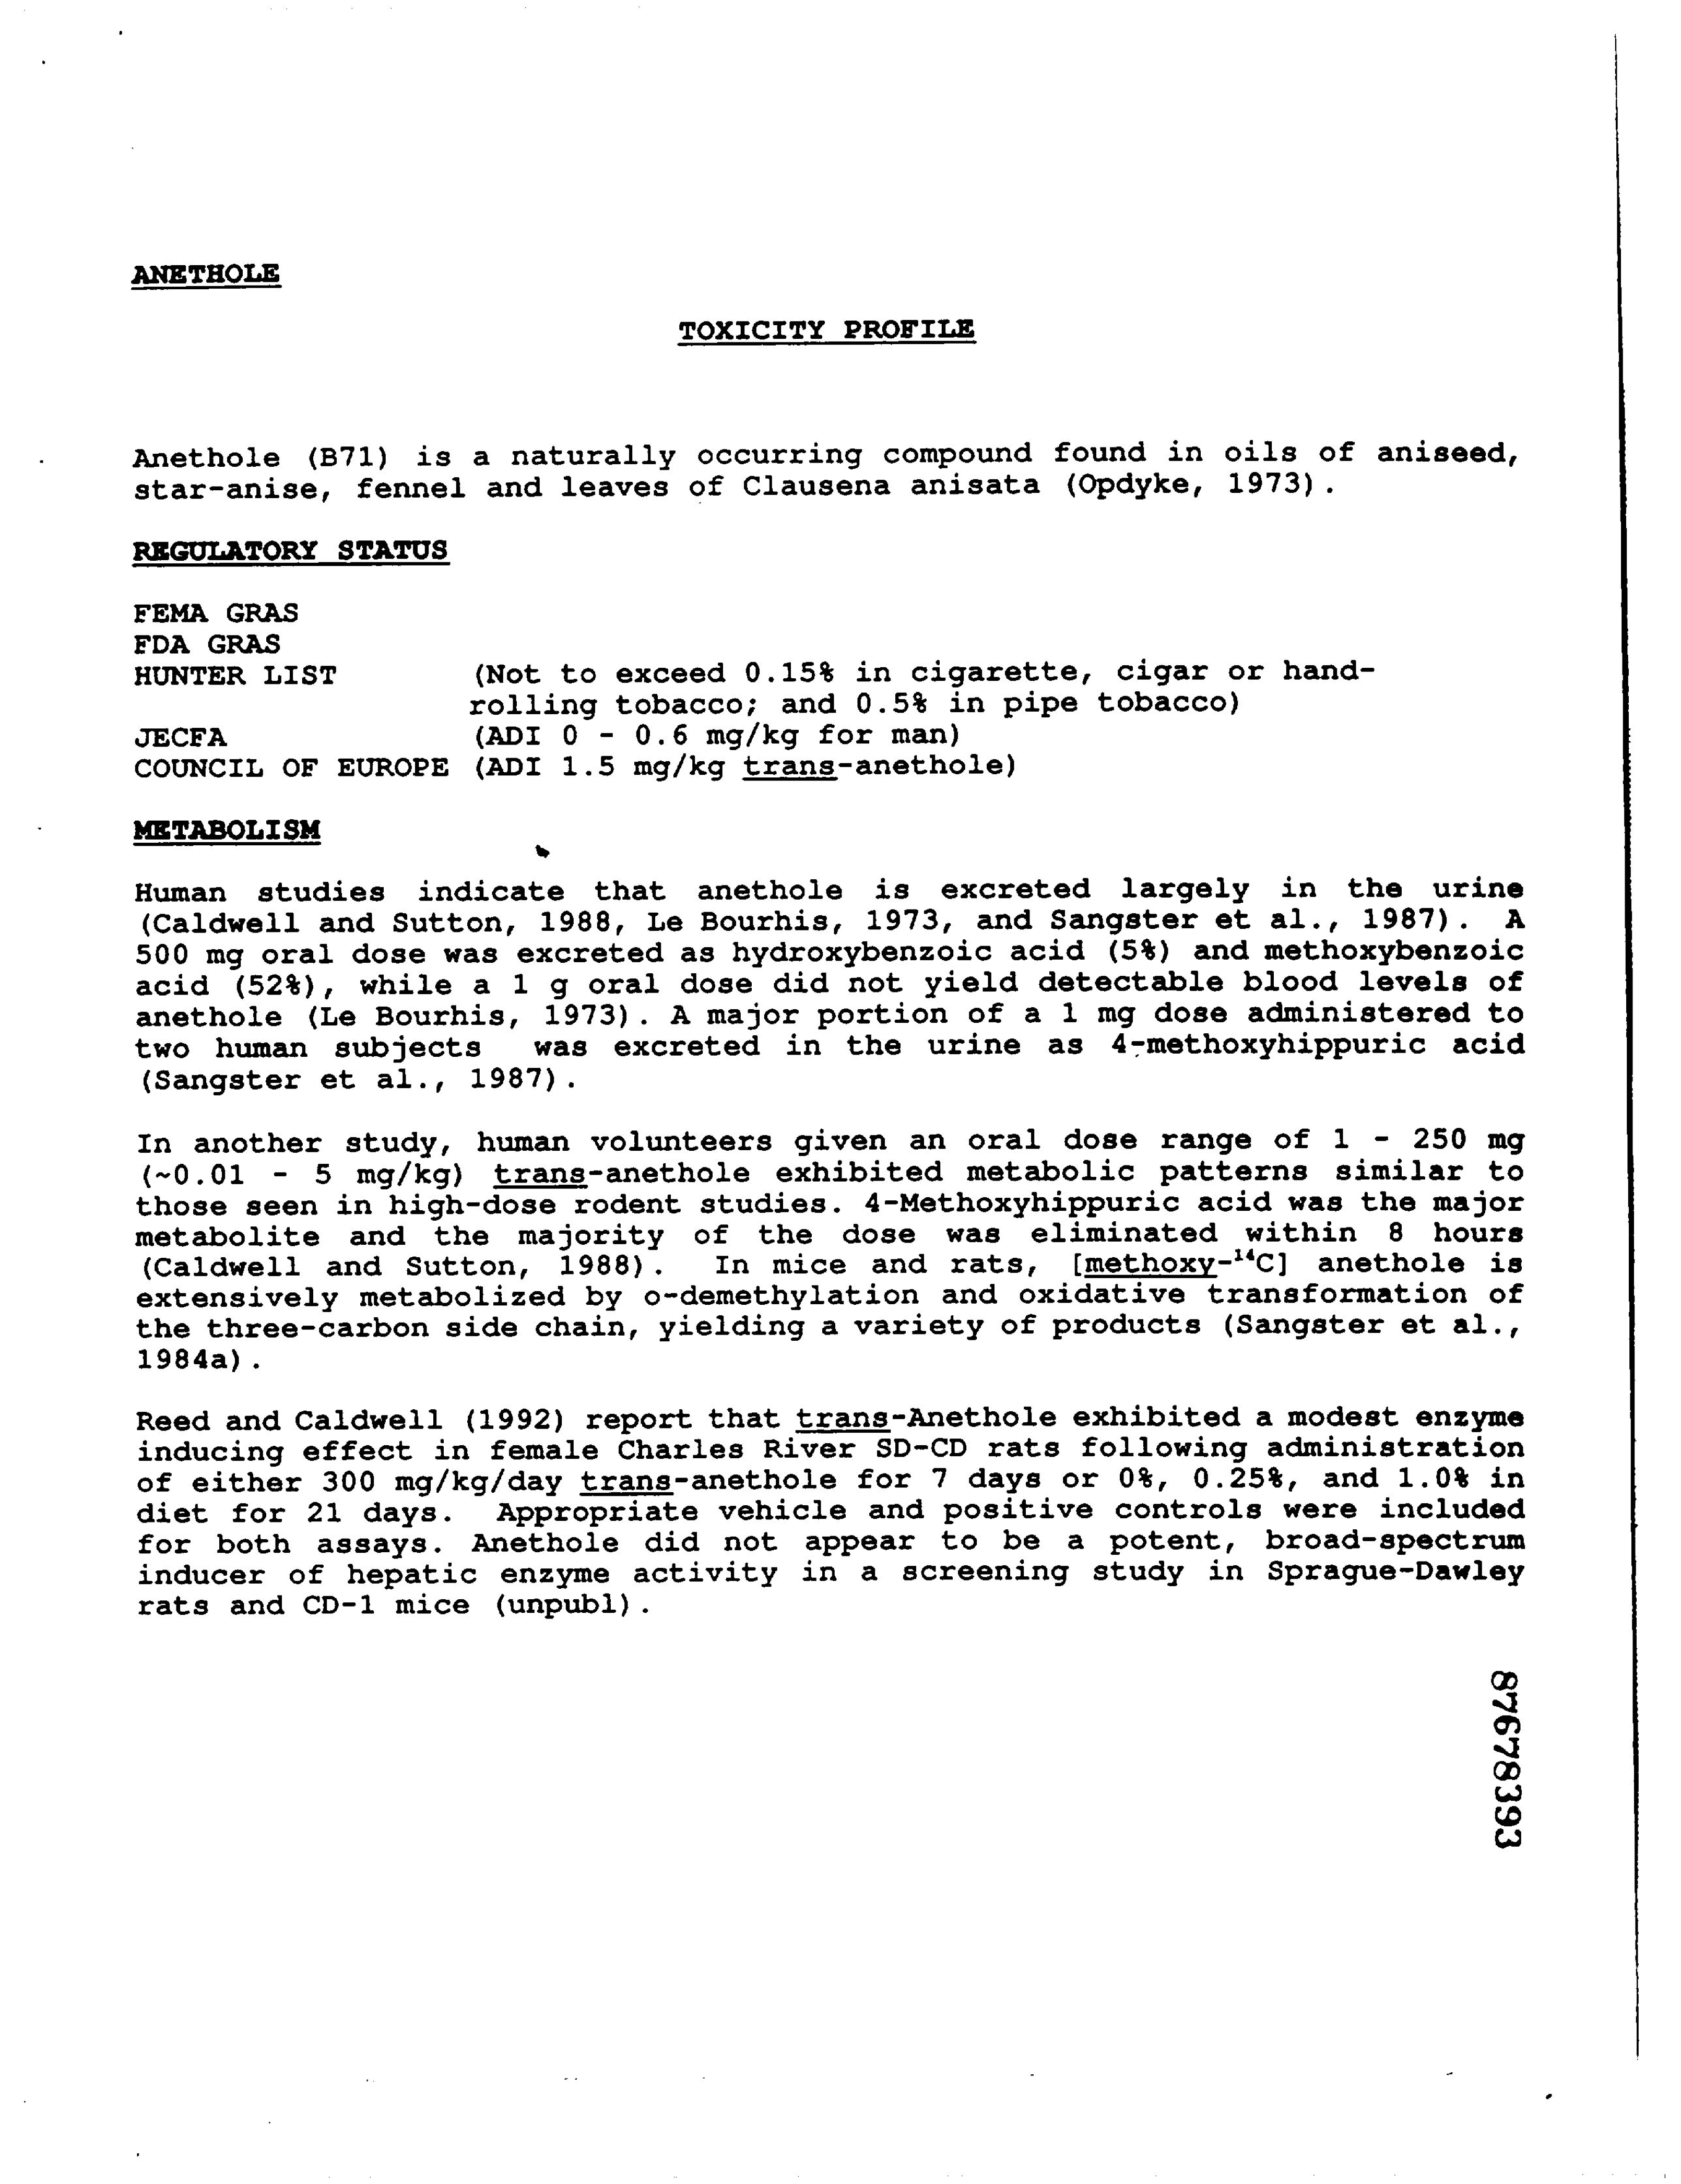

In [7]:
image_path = get_random_image_path(directory_path)

print(f"Randonly selected image is {image_path}")
display(image_path)



Issue - the image may be in any orentation and this may lead to loss on text from the ocr 

was solving this issue to detect the image text orentation and then try to correct it this will be disscused and solved in the image_analyisis.ipynb
example of this image will be Randonly selected image is C:\Users\Anime\Downloads\soul_ai\dataset\News\2072411039_1040.jpg

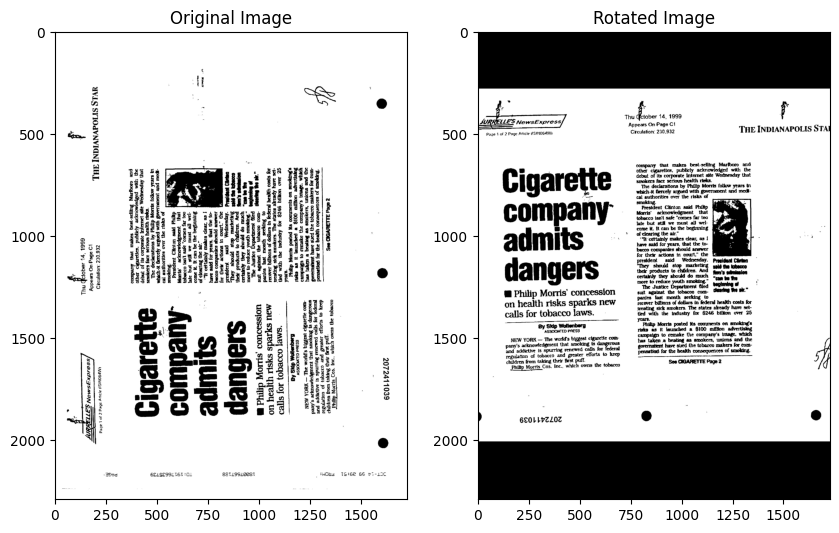

In [42]:
# import matplotlib.pyplot as plt

# def show_images(titles, images, n_rows, n_cols):
#     fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))
#     for i, ax in enumerate(axs.flat):
#         ax.imshow(images[i], cmap='gray')
#         ax.set_title(titles[i])
#     plt.show()

# image_path = r"C:\Users\Anime\Downloads\soul_ai\dataset\News\2072411039_1040.jpg"
# image = cv2.imread(image_path)
# angle = 180  # replace with your desired angle of rotation
# rotated_image = rotate_image(image, angle)

# # Convert the images to grayscale for displaying using matplotlib
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray_rotated_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# # Display the original and rotated images side by side
# titles = ['Original Image', 'Rotated Image']
# images = [gray_image, gray_rotated_image]
# show_images(titles, images, 1, 2)  # 1 row, 2 columns


Decorator to find the time of the function 

In [9]:
import time

def time_it(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f'Function {func.__name__} took {elapsed_time:.6f} seconds to run')
        return result
    return wrapper


function preprocess_text  use some basic text preprocessing and make it ready for futher process

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

@time_it
def preprocess_text(text):
    """Apply the preprocessing the extracted text from the ocr """
    # 1. Tokenization
    words = nltk.word_tokenize(text)

    # 2. Lowercasing
    words = [word.lower() for word in words]

    # 3. Removing Punctuation
    words = [word for word in words if word.isalnum()]

    # 4. Removing Stop Words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 5. Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # 6. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Join processed words into a single string
    processed_text = ' '.join(lemmatized_words)

    return processed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using langchain UnstructuredImageLoader to convert the image into a extracted text

In [13]:
from langchain_community.document_loaders.image import UnstructuredImageLoader
import warnings

warnings.filterwarnings("ignore")

@time_it
def get_image_langchain_content(image_path):
    # Create an instance of the UnstructuredImageLoader class with the image path
    loader = UnstructuredImageLoader(image_path)

    # Load the image data using the load() method of the UnstructuredImageLoader instance
    data = loader.load()

    # Extract the content of the image from the loaded data
    image_content = data[0].page_content

    # Return the content of the image
    return image_content


In [14]:

## Function calling for
image_path = image_path  # replace with your image path
image_content = get_image_langchain_content(image_path)



Function get_image_langchain_content took 3.710553 seconds to run


In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

@time_it
def preprocess_text(text):
    # 1. Tokenization
    words = nltk.word_tokenize(text)

    # 2. Lowercasing
    words = [word.lower() for word in words]

    # 3. Removing Punctuation
    words = [word for word in words if word.isalnum()]

    # 4. Removing Stop Words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 5. Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # 6. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Join processed words into a single string
    processed_text = ' '.join(lemmatized_words)

    return processed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
processed_text = preprocess_text(image_content)
print(processed_text)

Function preprocess_text took 1.071647 seconds to run
anethol toxic profil anethol b71 natur occur compound found oil anise fennel leav clausena anisata opdyk 1973 regulatori statu fema gra fda gra hunter list exceed cigarett cigar roll tobacco pipe tobacco jecfa adi 0 man council europ adi metabol human studi indic anethol excret larg urin caldwel sutton 1988 le bourhi 1973 sangster et 1987 500 mg oral dose excret hydroxybenzo acid 5 methoxybenzo acid 52 1 g oral dose yield detect blood level anethol le bourhi 1973 major portion 1 mg dose administ two human subject excret urin acid sangster et 1987 anoth studi human volunt given oral dose rang 1 250 mg 5 exhibit metabol pattern similar seen rodent studi acid major metabolit major dose elimin within 8 hour caldwel sutton 1988 mouse rat c anethol extens metabol oxid transform side chain yield varieti product sangster et 1984a reed caldwel 1992 report exhibit modest enzym induc effect femal charl river rat follow administr either 300 7 d

Here comes the speeech 

In [17]:
import spacy

# Load the SpaCy language model
nlp = spacy.load('en_core_web_sm')

# Given processed text
processed_text = processed_text

# Process the text with SpaCy
doc = nlp(processed_text)

# Extract named entities and part-of-speech tags
named_entities = [(ent.text, ent.label_) for ent in doc.ents]
pos_tags = [(token.text, token.pos_) for token in doc]

# Print results
print("Named Entities:")
for ent, label in named_entities:
    print(f"{ent}: {label}")

print("\nPart-of-Speech Tags:")
for token, pos in pos_tags:
    print(f"{token}: {pos}")


Named Entities:
anethol: PERSON
1973: DATE
fema: ORG
fda: ORG
gra hunter: PRODUCT
cigarett cigar: PERSON
jecfa: ORG
0: CARDINAL
metabol: ORG
anethol excret larg: PERSON
1988: DATE
1973: DATE
1987: DATE
500: MONEY
5: CARDINAL
52 1: CARDINAL
1973: DATE
1: CARDINAL
two: CARDINAL
1987: DATE
1 250: CARDINAL
5: CARDINAL
8 hour: TIME
1988: DATE
1984a: DATE
1992: DATE
300 7 day: DATE
21 day: DATE
anethol: PERSON
hepat: GPE
activ screen studi rat mouse unpubl: PERSON
e6eslil: CARDINAL

Part-of-Speech Tags:
anethol: VERB
toxic: ADJ
profil: PROPN
anethol: PROPN
b71: PROPN
natur: PROPN
occur: VERB
compound: NOUN
found: VERB
oil: NOUN
anise: NOUN
fennel: NOUN
leav: NOUN
clausena: PROPN
anisata: PROPN
opdyk: NOUN
1973: NUM
regulatori: PROPN
statu: PROPN
fema: PROPN
gra: PROPN
fda: PROPN
gra: PROPN
hunter: PROPN
list: NOUN
exceed: VERB
cigarett: PROPN
cigar: PROPN
roll: NOUN
tobacco: NOUN
pipe: NOUN
tobacco: NOUN
jecfa: PROPN
adi: PROPN
0: NUM
man: NOUN
council: PROPN
europ: PROPN
adi: PROPN
metabol:

In [18]:
import spacy

# Load the SpaCy language model
nlp = spacy.load('en_core_web_sm')
content = processed_text
doc = nlp(content)

for ent in doc.ents:
	print(ent.text, ent.start_char, ent.end_char, ent.label_)


anethol 0 7 PERSON
1973 105 109 DATE
fema 127 131 ORG
fda 136 139 ORG
gra hunter 140 150 PRODUCT
cigarett cigar 163 177 PERSON
jecfa 204 209 ORG
0 214 215 CARDINAL
metabol 238 245 ORG
anethol excret larg 264 283 PERSON
1988 304 308 DATE
1973 319 323 DATE
1987 336 340 DATE
500 341 344 MONEY
5 383 384 CARDINAL
52 1 403 407 CARDINAL
1973 463 467 DATE
1 482 483 CARDINAL
two 501 504 CARDINAL
1987 548 552 DATE
1 250 599 604 CARDINAL
5 608 609 CARDINAL
8 hour 706 712 TIME
1988 728 732 DATE
1984a 828 833 DATE
1992 847 851 DATE
300 7 day 939 948 DATE
21 day 956 962 DATE
anethol 1006 1013 PERSON
hepat 1034 1039 GPE
activ screen studi rat mouse unpubl 1046 1081 PERSON
e6eslil 1082 1089 CARDINAL


In [19]:
from spacy import displacy
displacy.render(doc, style="ent")


In [20]:
   
import pandas as pd 
pd.set_option("display.max_rows", 200)
entities = [(ent.text, ent.label_, ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities, columns=['text', 'type', 'lemma'])



: 